In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score
df = pd.read_csv('data/lab5_creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
print(df.isnull().sum()[0])

0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Modeling**

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred1 = svm_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

# **Evaluate**

In [7]:
print('Accuracy score: ', accuracy)
print('F1 Score: ',f1)

Accuracy score:  0.9987125920204113
F1 Score:  0.4907407407407407


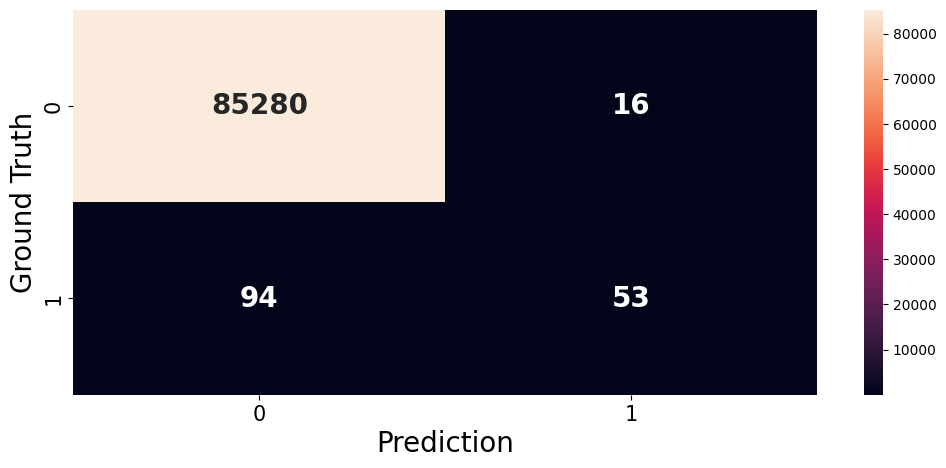

In [8]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['0','1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_xlabel('Prediction', fontsize=20);
ax.set_ylabel('Ground Truth', fontsize=20)
plt.show()

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Why this happen**

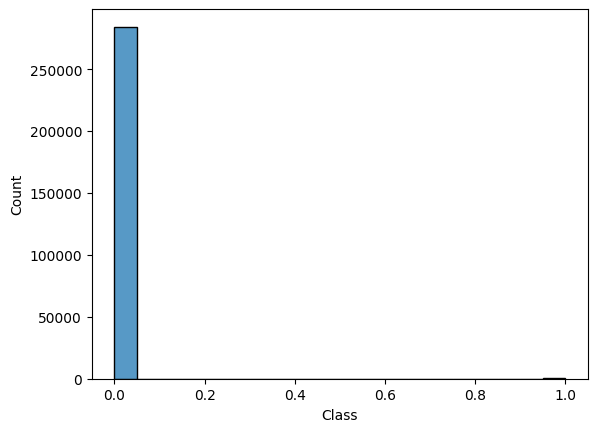

In [10]:
sns.histplot(data=df, x='Class')
plt.show()

# **Optimization**

**Feature Engineering**

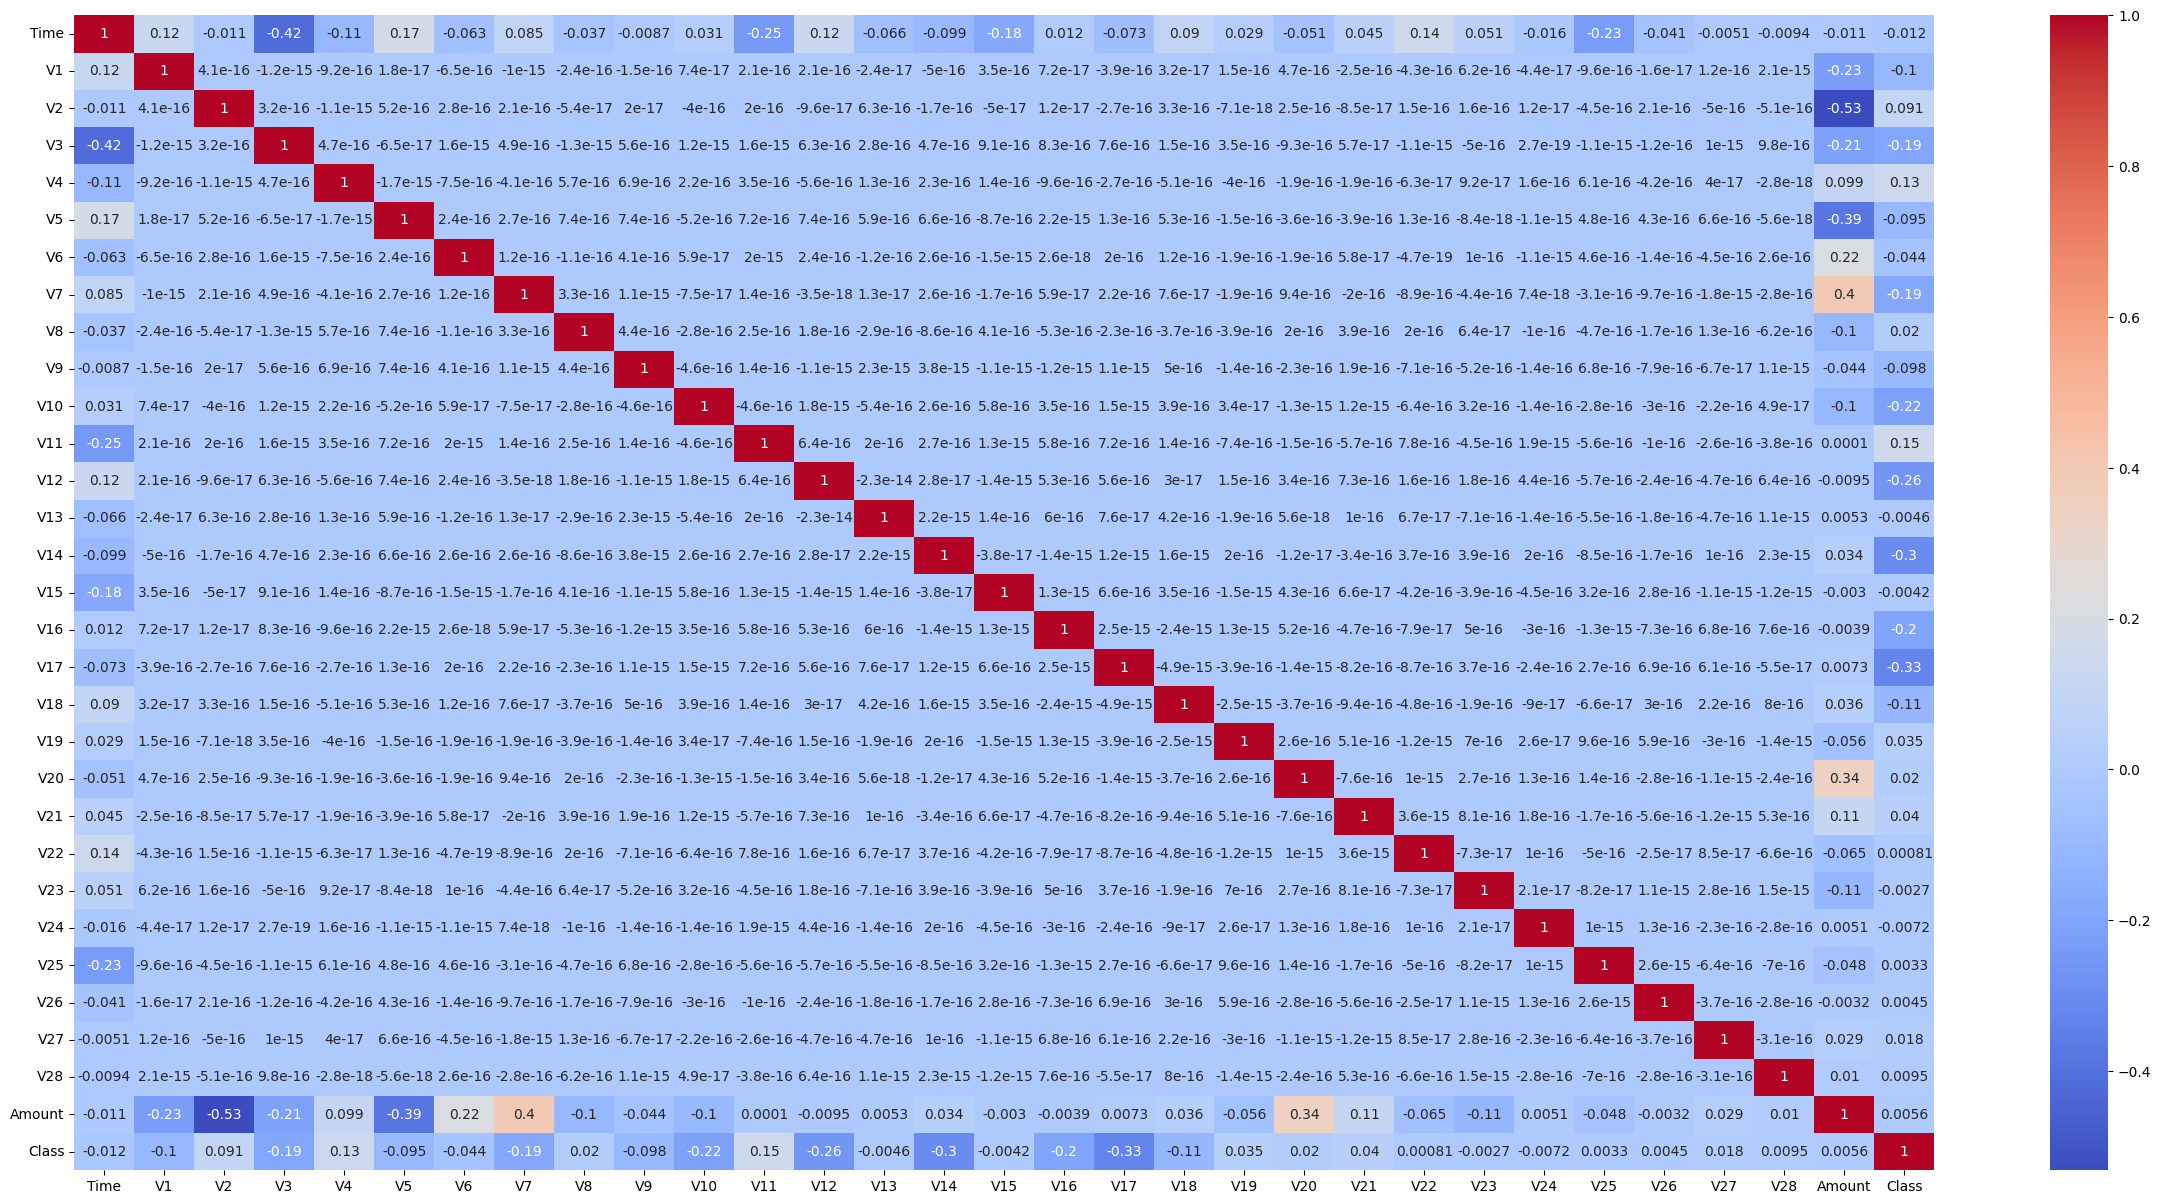

In [11]:
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot = True, cmap ='coolwarm')
plt.show()

In [12]:
col = df.drop('Class',axis =1).columns
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [13]:
corr_matrix = df.corr()["Class"].sort_values(ascending=False)
highly_correlated = corr_matrix[abs(corr_matrix) >= 0.1]

# Get the names of the highly correlated features
names = list(highly_correlated.index)
names.remove('Class')
print(names)


['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']


**Train_test_split**

In [14]:
names = ['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17','V19','V20','V5','V6','V2','V8','Amount']
X = df[names]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Use SVM again after Feature Selection**

In [15]:
# Train your SVM model on the balanced training data
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred2 = svm_model.predict(X_test)

f1_svm = f1_score(y_test, y_pred2)
precision_svm = precision_score(y_test, y_pred2)
recall_svm = recall_score(y_test, y_pred2)

# Evaluate the accuracy of the model
print('F1 Score:', f1_svm)
print('Precision Score:', precision_svm)
print('Recall Score:', recall_svm)


F1 Score: 0.5023696682464455
Precision Score: 0.828125
Recall Score: 0.36054421768707484


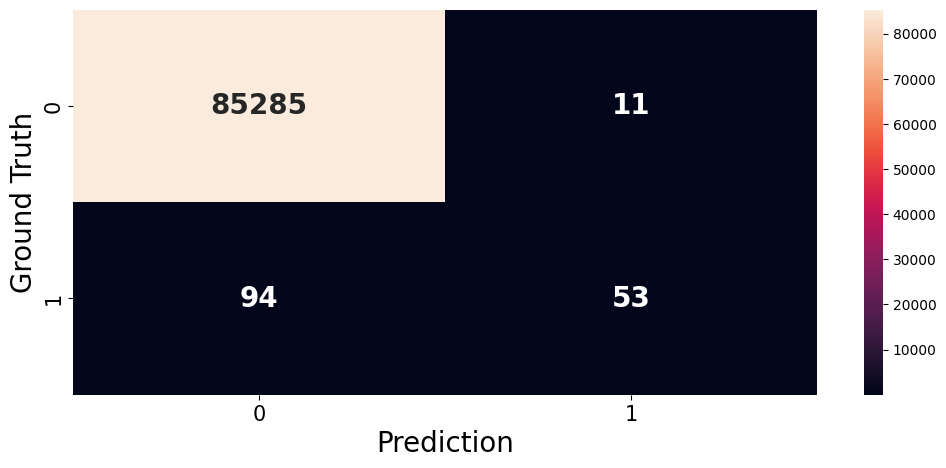

In [16]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['0','1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_xlabel('Prediction', fontsize=20);
ax.set_ylabel('Ground Truth', fontsize=20)
plt.show()

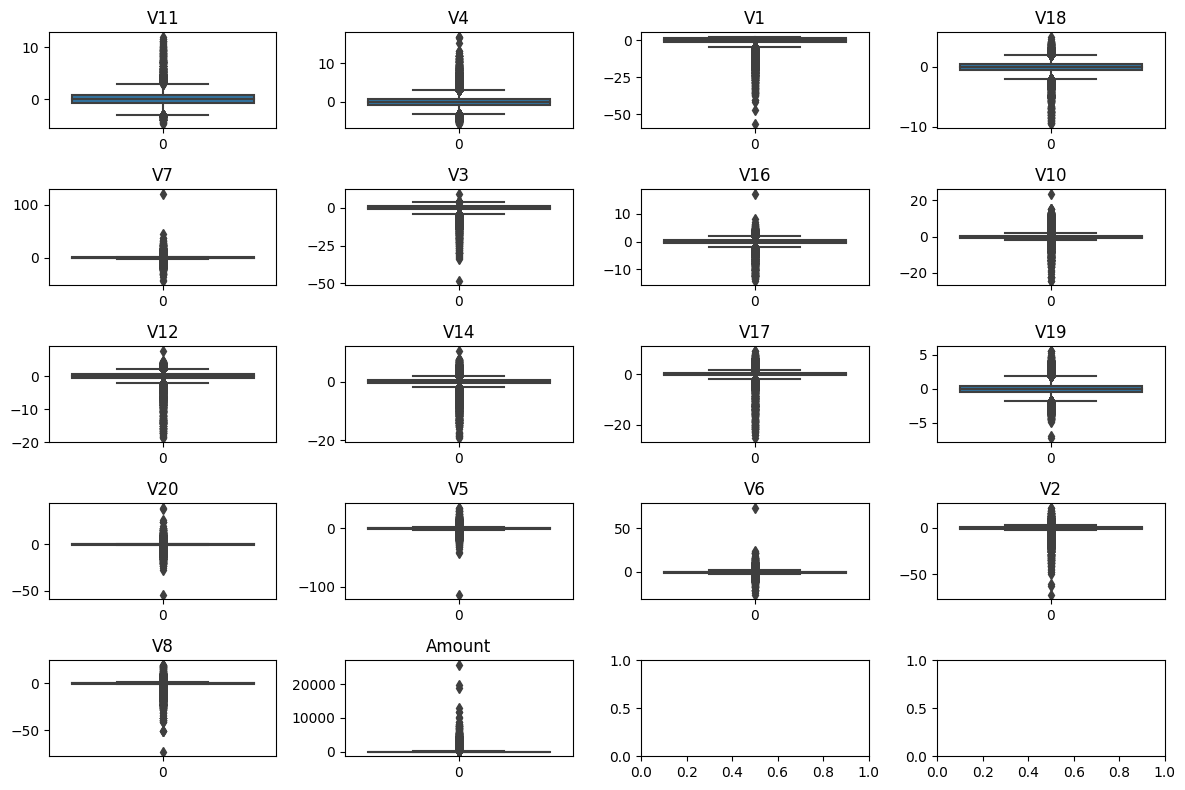

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'names' is a list of column names from your DataFrame
num_rows = len(names) // 4 + 1  # Calculate the number of rows required based on the number of columns
fig, axes = plt.subplots(num_rows, 4, figsize=(12, 8))

# Create box plots for each column in the DataFrame
for i, name in enumerate(names):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(data=df[name], ax=ax)
    ax.set_title(name)

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


**Removing the outliers**

In [18]:
q_low = X_train[names].quantile(0.005)
q_hi = X_train[names].quantile(0.995)

X_train[names] = X_train[names].clip(q_low, q_hi, axis=1)

X_test[names] = X_test[names].clip(q_low, q_hi, axis=1)


**Remove outliers sometimes can increase the performance of model but in this case, it not works well when we need trade off with the information that these outliers are contained.**

# **XGBoost and RandomOverSampling (with remove outliers)**

In [19]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

# Oversample the training set using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# best_params = study.best_params
xgb_model = xgb.XGBClassifier(learning_rate=0.5, max_depth=6)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred3 = xgb_model.predict(X_test)

f1_xgb = f1_score(y_test, y_pred3)
precision_xgb = precision_score(y_test, y_pred3)
recall_xgb = recall_score(y_test, y_pred3)

# Evaluate the accuracy of the model
print('F1 Score:',f1_xgb)
print('Precision Score:',precision_xgb)
print('Recall Score:', recall_xgb)


F1 Score: 0.8602150537634408
Precision Score: 0.9090909090909091
Recall Score: 0.8163265306122449


Text(120.72222222222221, 0.5, 'Ground Truth')

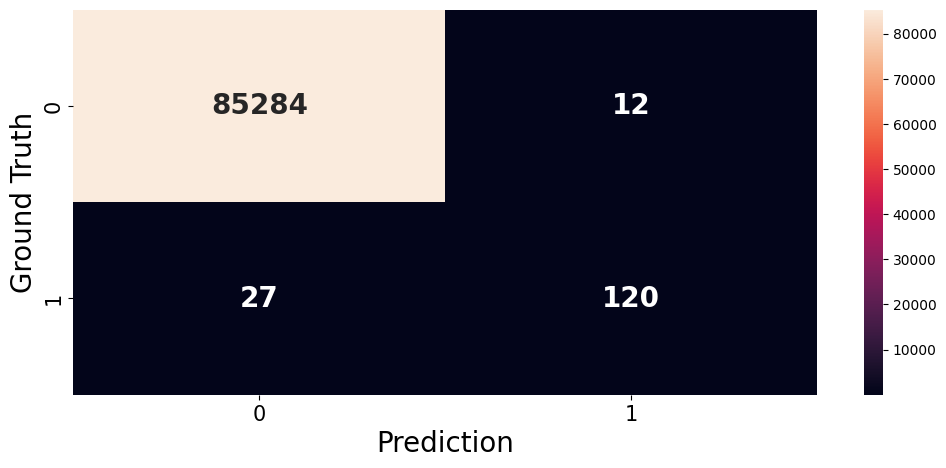

In [20]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['0','1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_xlabel('Prediction', fontsize=20);
ax.set_ylabel('Ground Truth', fontsize=20)

# **XGBoost and RandomOverSampling (without remove outliers)**

In [21]:
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

names = ['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17','V19','V20','V5','V6','V2','V8','Amount']
X = df[names]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Oversample the training set using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# best_params = study.best_params
xgb_model = xgb.XGBClassifier(learning_rate=0.5, max_depth=6)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred4 = xgb_model.predict(X_test)

f1_xgb = f1_score(y_test, y_pred4)
precision_xgb = precision_score(y_test, y_pred4)
recall_xgb = recall_score(y_test, y_pred4)

# Evaluate the accuracy of the model
print('F1 Score:',f1_xgb)
print('Precision Score:',precision_xgb)
print('Recall Score:', recall_xgb)


F1 Score: 0.8736462093862817
Precision Score: 0.9307692307692308
Recall Score: 0.8231292517006803


Text(120.72222222222221, 0.5, 'Ground Truth')

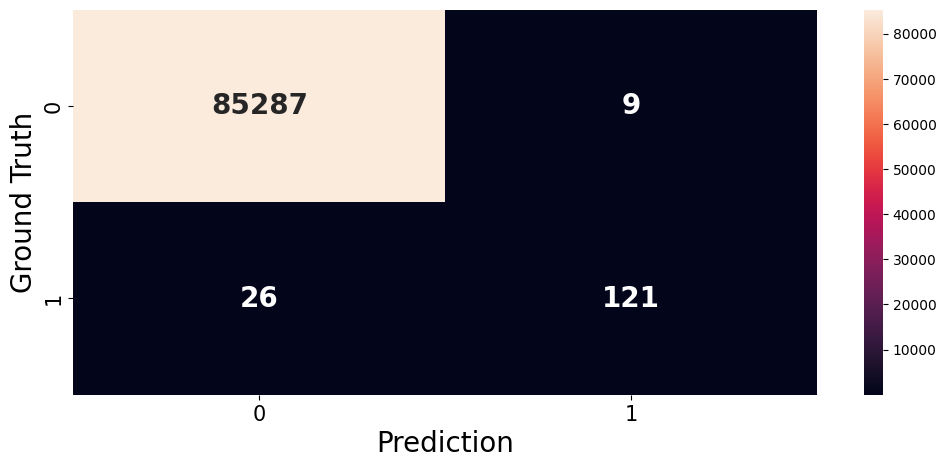

In [22]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='d', annot_kws={"size": 20, "weight": "bold"})  
labels = ['0','1']
ax.set_xticklabels(labels, fontsize=15);
ax.set_yticklabels(labels, fontsize=15);
ax.set_xlabel('Prediction', fontsize=20);
ax.set_ylabel('Ground Truth', fontsize=20)

# **Applying Tuning Hyperparameter**

In [23]:
import xgboost as xgb
import optuna
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    y_pred = xgb_model.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

names = ['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17','V19','V20','V5','V6','V2','V8','Amount']
X = df[names]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Oversample the training set using RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Use Optuna to optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_params

# Train XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)

f1_xgb = f1_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)

print('Best Parameters:', best_params)
print('F1 Score:', f1_xgb)
print('Precision Score:', precision_xgb)
print('Recall Score:', recall_xgb)


[I 2023-07-12 11:22:30,958] A new study created in memory with name: no-name-5b85670d-4797-4088-b260-10d3e6e199b2
[I 2023-07-12 11:23:12,795] Trial 0 finished with value: 0.8191126279863481 and parameters: {'booster': 'gbtree', 'learning_rate': 0.058037284949536076, 'max_depth': 12}. Best is trial 0 with value: 0.8191126279863481.
[I 2023-07-12 11:24:11,293] Trial 1 finished with value: 0.2809364548494983 and parameters: {'booster': 'dart', 'learning_rate': 0.023951786335382023, 'max_depth': 4}. Best is trial 0 with value: 0.8191126279863481.
[I 2023-07-12 11:24:38,422] Trial 2 finished with value: 0.8652482269503546 and parameters: {'booster': 'gbtree', 'learning_rate': 0.20559208268515108, 'max_depth': 6}. Best is trial 2 with value: 0.8652482269503546.
[I 2023-07-12 11:25:43,654] Trial 3 finished with value: 0.42685025817555944 and parameters: {'booster': 'dart', 'learning_rate': 0.03100994203717402, 'max_depth': 5}. Best is trial 2 with value: 0.8652482269503546.
[I 2023-07-12 11:2

Best Parameters: {'booster': 'gbtree', 'learning_rate': 0.45089841922975515, 'max_depth': 6}
F1 Score: 0.8673835125448027
Precision Score: 0.9166666666666666
Recall Score: 0.8231292517006803
